# 1.1 PIL - python imaging library
- pip install pillow
- It provides basic image handling operations (resizing, cropping, etc)

In [77]:
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [10]:
from PIL import Image

pil_im = Image.open('/Users/sejongpyo/Downloads/building.jpg')

# convert to Grayscale
# pil_im = Image.open('/Users/sejongpyo/Downloads/building.jpg').convert('L')

### Convert images to another format

In [ ]:
from PIL import Image
import os

for infile in filelist:
    outfile = os.path.splitext(infile)[0] + '.jpg'
    
    if infile != outfile:
        try:
            Image.open(infile).save(outfile)
        except IOError:
            print("cannot convert", infile)

### Create thumbnails
- convert the image to a thumbnail image with size

In [ ]:
pil_im.thumbnail((128, 128))

### Copy and paste regions
- crop : cropping a region
- paste : PIL uses a coordinate system with (0, 0) in the upper left corner.

In [12]:
box = (100, 100, 400, 400)
region = pil_im.crop(box)

In [13]:
region = region.transpose(Image.ROTATE_180)
pil_im.paste(region, box)

### Resize and rotate

In [14]:
# resize
out = pil_im.resize((128, 128))

# rotate
out = pil_im.rotate(45)

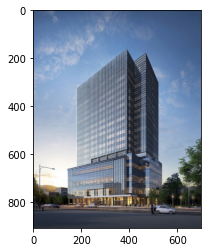

In [11]:
plt.imshow(pil_im)

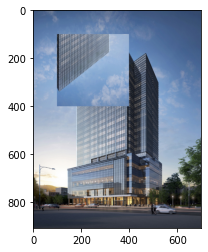

In [15]:
# copy and paste
plt.imshow(pil_im)

# 1.2 Matplotlib (pylab)
### Plotting images, points and lines
- show things like interest points, correspondences and detected objects using points and lines.

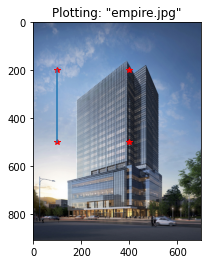

In [16]:
from PIL import Image
from pylab import *

im = array(Image.open('/Users/sejongpyo/Downloads/building.jpg'))

imshow(im)

x = [100,100,400,400]
y = [200,500,200,500]

# plot the points with red star-markers
plot(x, y, 'r*')

# line plot connecting the first two points
plot(x[:2], y[:2])

# add title and show the plot
title('Plotting: "empire.jpg"')
show()

### Image contours and histograms
- Visualizing image iso-contours can be very useful.

(0.5, 699.5, 0.5, 905.5)

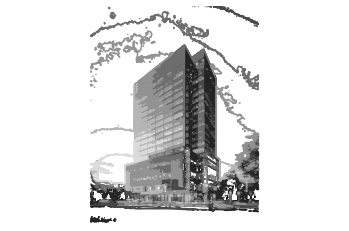

In [18]:
from PIL import Image
from pylab import *

im = array(Image.open('/Users/sejongpyo/Downloads/building.jpg').convert('L'))

figure()

gray()

contour(im, origin = 'image')
axis('equal')
axis('off')

- image histogram shows the distribution of pixel values.
- hist(1-D array as input, bins)

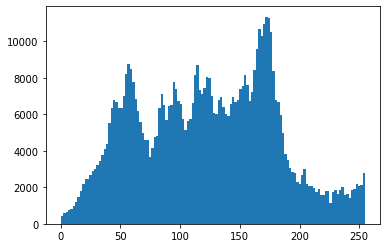

In [19]:
figure()
hist(im.flatten(), 128) # number of bins to use
show()

### Interactive annotation
- marking points in an image, or annotate some training data.

In [ ]:
im = array(Image.open('/Users/sejongpyo/Downloads/building.jpg'))
imshow(im)

print('Please click 3 points')
x = ginput(3)
print('you cliked: ', x)
show()

# 1.3 Numpy
### Array image representation
- Arrays in NumPy are multi-dimensional and can represent vectors, matrices, and images.
- Like a list but restricted to having all elements of the same type.

In [26]:
im = array(Image.open('/Users/sejongpyo/Downloads/building.jpg'))
print(im.shape, im.dtype)

im = array(Image.open('/Users/sejongpyo/Downloads/building.jpg').convert('L'), 'f')
print(im.shape, im.dtype)

(906, 700, 3) uint8
(906, 700) float32


- (rows, columns, color channels)
- Images are usually encoded with unsigned 8-bit integers (uint8)
- grayscale image doesn't have a color channels

In [ ]:
# set the values of row i with values from row j
im[i,:] = im[j,:]

# set all values in column i to 100
im[:,i] = 100

# the sum of the values of the first 100 rows and 50 columns
im[:100,:50].sum()

# rows 50-100, columns 50-100 (100th not included)
im[50:100,50:100]

# average of row i
im[i].mean()

# last column
im[:,-1]

# second to last row
im[-2,:]

### Graylevel transforms

In [37]:
im = array(Image.open('/Users/sejongpyo/Downloads/building.jpg').convert('L'))

# invert image
im2 = 255 - im

# clamp to interval 100 ... 200
im3 = (100.0/255) * im + 100

# squared (lowers the values of the darker pixels)
im4 = 255.0 * (im / 255.0)**2

In [41]:
print(int(im.min()), int(im.max()))
print(int(im2.min()), int(im2.max()))
print(int(im3.min()), int(im3.max()))
print(int(im4.min()), int(im4.max()))

0 255
0 255
100 200
0 255


- reverse of the array() transformation

In [42]:
pil_im = Image.fromarray(im)

- operation to change the data type from 'uint8' to another, need to convert back
- <u>Numpy will always change the array type to the 'lowerst' type that can represent the data</u>

In [43]:
pil_im = Image.fromarray(uint8(im))

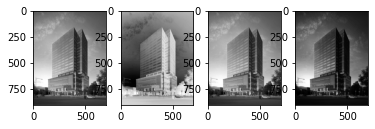

In [54]:
f, ax = plt.subplots(1, 4)
ax[0].imshow(im)
ax[1].imshow(im2)
ax[2].imshow(im3)
ax[3].imshow(im4)

### Image resizing

In [55]:
def imresize(im,sz):
    """ Resize an image array using PIL. """
    pil_im = Image.fromarray(uint8(im))
    
    return array(pil_im.resize(sz))

### Histogram equalization
- grayscale transform is the one of histogram equalization.
- good way to normalize image intensity and to increase image contrast.
- The transform funciton is in this case a cdf (cumulative distribution function) of the pixel values.

In [79]:
def histeq(im,nbr_bins=256):
    """ Histogram equalization of a grayscale image. """
    # get image histogram
    imhist,bins = histogram(im.flatten(), nbr_bins, normed=True)
    
    # cumulative distribution function cdf = 255 * cdf / cdf[-1] # normalize
    cdf = imhist.cumsum()
    
    # use linear interpolation of cdf to find new pixel values
    im2 = interp(im.flatten(), bins[:-1], cdf)
    
    return im2.reshape(im.shape), cdf

im2, cdf = histeq(array(Image.open('/Users/sejongpyo/Downloads/building.jpg').convert('L')))

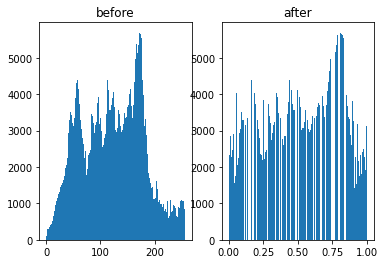

In [82]:
f, ax = plt.subplots(1, 2)
ax[0].hist(im.flatten(), 256)
ax[0].set_title('before')
ax[1].hist(im2.flatten(), 256)
ax[1].set_title('after')
plt.show()

### Averaging images
- reduce noise in an image and also often used for artistic effects.
- compute the average of all those images by simply summing them up and divide with number of images.

In [91]:
def compute_average(imlist):
    """ Compute the average of a list of images. """
    
    # open first image and make into array of type float
    averageim = array(Image.open(imlist[0]), 'f')
    
    skipped =  0
    
    for imname in imlist[1:]:
        try:
            averageim += array(Image.open(imname))
        except:
            print(imname + '...skipped')
            skipped += 1
            
    averageim /= (len(imlist) - skipped)
    
    # return average as uint8
    return array(averageim, 'uint8')

### PCA of images
- useful technique for dimensionality reduction
- projection matrix resulting from PCA can be seen as a change of coordinates to a coordinate system where the coordinates are in descending order of importance.
1. convert image to 1D (flatten).
2. Stack 1D image in a single matrix by each row.
3. The rows are then centered relative to the mean image before the computation of the dominant directions.
- To find the principal components, SVD (singular value decomposition(SVD) is usually used)

In [92]:
def pca(X):
    """ Principal Component Analysis
        input: X, matrix with training data stored as flattened arrays in rows
        return: projection matrix (with important dimensions first), variance and mean. """
    # get dimensions
    num_data, dim = X.shape
    
    # center data
    mean_X = X.mean(axis=0)
    X = X - mean_X
    
    if dim > num_data:
        # PCA - compact trick used
        M = np.dot(X, X.T) # covariance matrix
        e,EV = np.linalg.eigh(M) # eigenvalues and eigenvectors
        tmp = np.dot(X.T, EV).T # this is the compact trick
        # reverse since last eigenvectors are the ones we want 
        V = tmp[::-1]
        # reverse since eigenvalues are in increasing order
        S = sqrt(e)[::-1]
        
        for i in range(V.shape[1]):
            V[:, i] /= S
    else:
        # PCA - SVD used
        U, S, V = np.linalg.svd(X)
        V = V[:num_data] # only makes sense to return the first num_data
        
    # return the projection matrix, the variance and the mean
    return V, S, mean_X

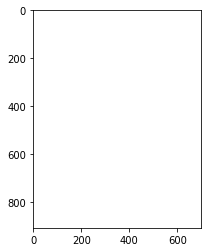

In [112]:
# load img
im = array(Image.open('/Users/sejongpyo/Downloads/building.jpg').convert('L'))
m, n = im.shape

# put flattened img to matrix by one row
X = im.flatten()
X = im.reshape(1, -1)

# perform PCA
V, S, immean = pca(X)

figure()
gray()
imshow(V.reshape(m, n))
show()

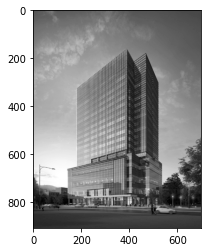

In [110]:
imshow(im)

In [104]:
X.shape

(1, 634200)